In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generic Functions

In [2]:
def get_full_df(npy_file):
    file = np.load(npy_file, allow_pickle=True)
    df = pd.DataFrame(file.T)
    df["iters"] = df.index + 1
    df = df[["iters"] + [col for col in df.columns if col != "iters"]]
    return df

def get_summary_df(full_df, metric="mse", n_reps=10, prop_iters=1.0):
    df = {}
    min_val_list = []
    min_val_iters_list = []
    final_val_list = []
    final_val_iters = []
    n_iters = int(prop_iters*len(full_df))
    for i in range(n_reps):
        val_list = full_df[i].to_list()
        val_list = val_list[:n_iters]
        min_val = np.min(val_list)
        min_val_iters = np.argmin(val_list)+1
        final_val = val_list[-1]
        min_val_list.append(min_val)
        min_val_iters_list.append(min_val_iters)
        final_val_list.append(final_val)
        final_val_iters.append(len(val_list))
    df = pd.DataFrame({f"min_{metric}": min_val_list, f"min_{metric}_iters": min_val_iters_list, 
                       f"final_{metric}": final_val_list, f"final_{metric}_iters": final_val_iters})
    return df

def get_lhs_plots(full_df, n_reps=10, prop_iters=0.1, subset=None, savefig=False):
    fig, ax = plt.subplots(figsize=(10,8))
    n_iters = int(prop_iters*len(full_df))
    if subset is None:
        seed_list = np.arange(0, n_reps)
    else:
        seed_list = subset
    for i in seed_list:
        lhs_vals = full_df[i].to_list()
        lhs_vals = lhs_vals[:n_iters]
        ax.plot(lhs_vals, label=f"seed {i}", alpha=0.7)
    ax.set_yscale("log")
    ax.set_xlabel("Iterations", fontsize=16)
    ax.set_ylabel("LHS", fontsize=16)
    ax.set_title(f"LHS during training (first {n_iters} iters)", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    #ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
    if savefig:
        plt.savefig('lhs_plot.png', dpi=300)
    else:
        plt.show()

# 1. EXP

## 1.1 No noise

In [3]:
# Get a summary of the MSE across seeds
exp_full = get_full_df("rand_reps_exp.npy")
exp_summary = get_summary_df(exp_full, n_reps=20)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.182350e-16,760,1.291466e-14,1000
1,3.182350e-16,758,3.182350e-16,1000
2,3.182350e-16,583,3.182350e-16,1000
3,3.182350e-16,754,1.291466e-14,1000
4,3.182350e-16,843,3.182350e-16,1000
5,3.182350e-16,737,1.294608e-14,1000
6,3.182350e-16,804,3.182350e-16,1000
7,3.182350e-16,719,3.182350e-16,1000
8,3.182350e-16,790,3.182350e-16,1000
9,3.182350e-16,813,3.182350e-16,1000


## 1.2 LHS Noise

In [4]:
# Get a summary of the MSE across seeds
exp_full = get_full_df("rand_reps_exp_noise.npy")
exp_summary = get_summary_df(exp_full, n_reps=20)
exp_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.182350e-16,760,4.948368e-14,1000
1,3.182350e-16,800,3.182350e-16,1000
2,3.182350e-16,827,3.182350e-16,1000
3,3.182350e-16,781,1.294608e-14,1000
4,3.182350e-16,711,1.294608e-14,1000
5,3.182350e-16,795,1.294608e-14,1000
6,3.182350e-16,805,1.291466e-14,1000
7,3.182350e-16,736,3.182350e-16,1000
8,3.182350e-16,802,3.182350e-16,1000
9,3.182350e-16,827,3.182350e-16,1000


# 2. SHO

## 2.1 No noise

In [5]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho.npy")
sho_summary = get_summary_df(sho_full, n_reps=20)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,6.949882e-13,9640,2.646104e-12,10000
1,1.059259e-12,9841,9.952952e-12,10000
2,2.800808e-12,9212,5.772310e-11,10000
3,1.161548e-12,9237,4.432507e-12,10000
4,8.455382e-13,9955,1.800132e-12,10000
5,1.034651e-12,9301,2.239698e-12,10000
6,1.020633e-12,8834,3.868005e-11,10000
7,1.568049e-12,9681,8.094686e-12,10000
8,6.695560e-13,9917,1.932253e-12,10000
9,6.603821e-13,9552,1.280856e-12,10000


## 2.2 LHS Noise

In [6]:
# Get a summary of the MSE across seeds
sho_full = get_full_df("rand_reps_sho_noise.npy")
sho_summary = get_summary_df(sho_full, n_reps=20)
sho_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,9.539417e-13,9959,5.610926e-12,10000
1,1.102549e-12,9982,5.762891e-12,10000
2,3.191839e-13,9682,1.907260e-12,10000
3,7.990339e-13,9835,1.126042e-11,10000
4,1.721623e-12,8985,1.032390e-11,10000
5,2.793750e-12,9887,2.985531e-11,10000
6,8.449570e-13,9633,2.089088e-12,10000
7,4.482795e-13,9665,1.122717e-11,10000
8,8.377300e-13,9239,1.172766e-11,10000
9,1.158776e-12,9915,4.474249e-12,10000


# 3. NLO

## 3.1 No noise

In [7]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo.npy")
nlo_summary = get_summary_df(nlo_full, n_reps=20)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.032193e-12,8939,3.971227e-12,20000
1,6.134351e-12,7956,1.392060e-11,20000
2,2.730815e-12,8652,8.541823e-12,20000
3,1.463018e-12,9031,2.173762e-12,20000
4,8.591035e-13,9883,1.983389e-12,20000
5,2.966206e-12,8043,1.304809e-11,20000
6,3.185039e-02,78,1.051502e+00,20000
7,1.897671e-12,9506,2.779650e-12,20000
8,1.559392e-12,10389,1.851765e-12,20000
9,6.431882e-10,8652,7.880649e-10,20000


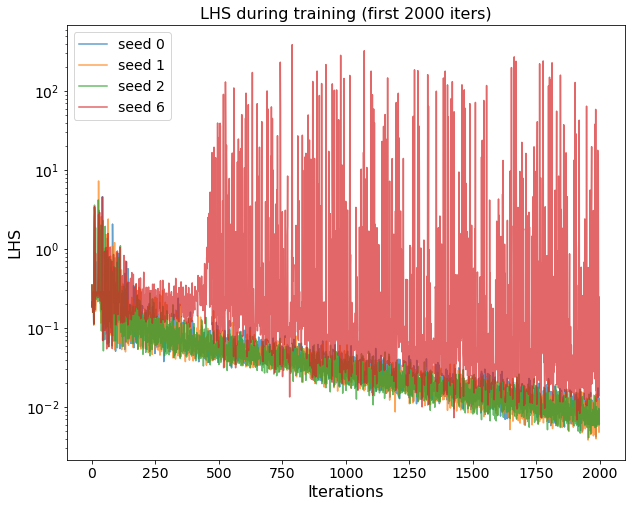

In [8]:
# Plot the LHS during training
nlo_lhs = get_full_df("rand_reps_nlo_lhs.npy")
get_lhs_plots(nlo_lhs, n_reps=20, prop_iters=0.2, subset=[0,1,2,6], savefig=False)

## 3.2 LHS Noise

In [9]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo_noise.npy")
nlo_summary = get_summary_df(nlo_full, n_reps=20)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.374536e-12,9531,1.944244e-12,20000
1,3.891232e-12,9292,5.529722e-12,20000
2,4.820108e-12,8506,1.052817e-11,20000
3,3.752197e-12,8699,6.965036e-12,20000
4,8.735825e-12,7488,1.502813e-11,20000
5,2.563437e-12,9606,4.076467e-12,20000
6,2.301169e-11,8412,6.294290e-11,20000
7,9.646977e-12,7923,1.283425e-11,20000
8,4.922947e-12,8420,1.131490e-11,20000
9,3.548549e-02,41,1.050310e+00,20000


## 3.3 LHS+RHS Noise

In [26]:
# Get a summary of the MSE across seeds
nlo_full = get_full_df("rand_reps_nlo_doublenoise.npy")
nlo_summary = get_summary_df(nlo_full, n_reps=20)
nlo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,6.368816e-12,8434,1.855365e-11,10000
1,1.455051e-12,9205,2.130506e-12,10000
2,1.906840e-12,8471,8.660139e-12,10000
3,1.061148e-12,9020,2.668713e-12,10000
4,5.300110e-12,8216,2.293310e-11,10000
5,4.070367e-10,9340,5.833185e-10,10000
6,4.631085e-12,8887,1.354885e-11,10000
7,1.356922e-11,7869,3.412323e-11,10000
8,1.268295e-12,8890,5.747522e-12,10000
9,2.180953e-12,8718,7.154729e-12,10000


# 4. POS

## 4.1 No noise

In [10]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos.npy")
pos_summary = get_summary_df(pos_full, n_reps=20)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.050902e-12,2568,1.436877e-12,4000
1,1.707731e-12,2425,2.146807e-12,4000
2,7.787284e-13,2475,1.124654e-12,4000
3,1.082065e-12,2309,1.140577e-12,4000
4,9.097692e-13,2395,1.005552e-12,4000
5,5.054767e-13,2373,5.399321e-13,4000
6,1.063744e-12,2232,2.098965e-12,4000
7,8.850637e-13,2531,1.581557e-12,4000
8,8.161408e-13,2292,8.734907e-13,4000
9,1.625556e-12,2420,2.124601e-12,4000


## 4.1 LHS Noise

In [11]:
# Get a summary of the MSE across seeds
pos_full = get_full_df("rand_reps_pos_noise.npy")
pos_summary = get_summary_df(pos_full, n_reps=20)
pos_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,7.243365e-13,2428,7.368961e-13,4000
1,9.406646e-13,2429,1.018812e-12,4000
2,3.482194e-12,2627,3.516865e-12,4000
3,8.932084e-13,2729,9.842007e-13,4000
4,1.024856e-12,2149,3.209966e-12,4000
5,1.155631e-12,2511,1.444044e-12,4000
6,6.549532e-13,2323,6.722455e-13,4000
7,4.322165e-13,2472,4.972379e-13,4000
8,6.443785e-13,2437,1.155068e-12,4000
9,1.164365e-12,2327,2.764802e-12,4000


# 5. SIR

## 5.1 No noise

In [12]:
# Get a summary of the MSE across seeds
sir_full = get_full_df("rand_reps_sir.npy")
sir_summary = get_summary_df(sir_full, n_reps=20)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.165608e-09,26379,1.333045e-09,30000
1,1.662751e-03,3975,3.875408e-01,30000
2,2.692391e-03,29183,2.790096e-03,30000
3,1.980816e-09,29898,2.046600e-09,30000
4,2.755768e-08,26778,3.059807e-08,30000
5,1.993265e-07,15263,2.452545e-07,30000
6,6.597986e-07,22483,9.111996e-07,30000
7,1.541048e-08,20241,5.142203e-08,30000
8,1.707286e-08,29994,1.725338e-08,30000
9,2.210747e-09,27238,2.774004e-09,30000


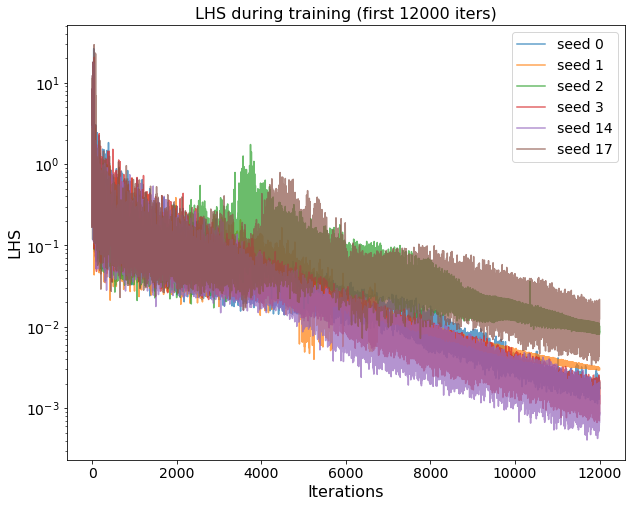

In [13]:
# Plot the LHS during training
sir_lhs = get_full_df("rand_reps_sir_lhs.npy")
get_lhs_plots(sir_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,2,3,14,17])

## 5.2 LHS Noise

In [14]:
# Get a summary of the MSE across seeds
sir_full = get_full_df("rand_reps_sir_noise.npy")
sir_summary = get_summary_df(sir_full, n_reps=20)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.458922e-07,26345,4.847688e-07,30000
1,2.953224e-08,29977,3.050655e-08,30000
2,5.172009e-09,29989,5.268113e-09,30000
3,1.055127e-07,29993,1.070018e-07,30000
4,9.305415e-09,29943,9.537780e-09,30000
5,1.542368e-08,29991,1.571501e-08,30000
6,5.377069e-07,29943,5.426709e-07,30000
7,7.139307e-04,30000,7.139307e-04,30000
8,8.494647e-09,29098,9.117068e-09,30000
9,4.053935e-08,29371,4.183498e-08,30000


## 5.3 LHS+RHS Noise

In [28]:
# Get a summary of the MSE across seeds
sir_full = get_full_df("rand_reps_sir_doublenoise.npy")
sir_summary = get_summary_df(sir_full, n_reps=20)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,5.511041e-08,29770,5.805630e-08,30000
1,1.490496e-07,29990,1.494890e-07,30000
2,6.826839e-09,29938,7.057752e-09,30000
3,8.900641e-09,29994,8.924284e-09,30000
4,6.567103e-03,1557,6.327881e-02,30000
5,2.003652e-09,29999,2.005574e-09,30000
6,2.154782e-08,29328,2.170004e-08,30000
7,1.028529e-08,25686,1.872783e-08,30000
8,4.551431e-08,22105,7.428739e-08,30000
9,4.005366e-03,30000,4.005366e-03,30000


In [7]:
# (newly tuned hyperparameters, different from above)
sir_full = get_full_df("sir_rand_reps_gan.npy")
sir_summary = get_summary_df(sir_full, n_reps=10)
sir_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,8.281728e-10,13745,8.976888e-10,30000
1,3.028569e-02,135,2.445539e-01,30000
2,1.007422e-09,18285,1.124238e-09,30000
3,1.148130e-09,20957,1.148728e-09,30000
4,1.045196e-02,272,3.899806e-01,30000
5,1.597298e-10,17135,2.132152e-10,30000
6,8.330930e-03,225,3.101303e-01,30000
7,1.405037e-09,20401,1.511146e-09,30000
8,2.838037e-02,141,3.852995e-01,30000
9,3.465437e-02,72,3.864003e-01,30000


# 6. COO

## 6.1 No noise

In [15]:
# Get a summary of the MSE across seeds
coo_full = get_full_df("rand_reps_coo.npy")
coo_summary = get_summary_df(coo_full, n_reps=20)
coo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.927478e-01,1523,3.916578e-01,50000
1,1.602252e-07,49983,1.815365e-07,50000
2,1.660811e-08,49948,3.127795e-08,50000
3,5.003755e-02,49938,5.007989e-02,50000
4,3.418450e-01,1238,4.573132e-01,50000
5,2.833313e-07,49963,3.346912e-07,50000
6,7.983864e-02,45714,8.131634e-02,50000
7,3.961707e-09,48694,7.051041e-09,50000
8,3.255852e-01,1779,4.935453e-01,50000
9,2.318513e-01,49409,2.319426e-01,50000


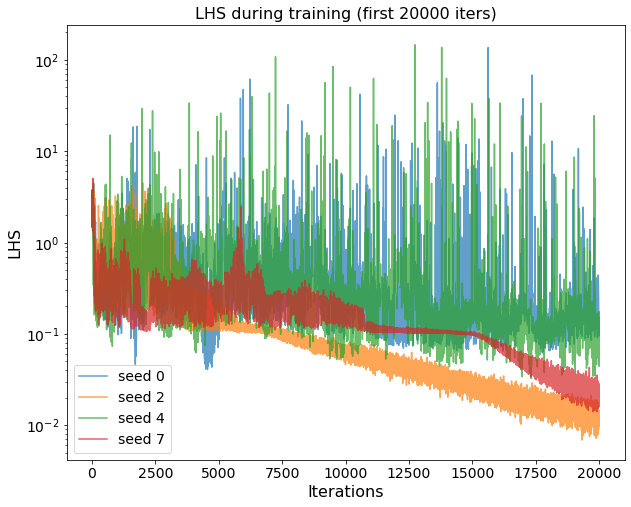

In [16]:
# Plot the LHS during training
coo_lhs = get_full_df("rand_reps_coo_lhs.npy")
get_lhs_plots(coo_lhs, n_reps=20, prop_iters=0.4, subset=[0,2,4,7])

## 6.2 LHS Noise

In [17]:
# Get a summary of the MSE across seeds
coo_full = get_full_df("rand_reps_coo_noise.npy")
coo_summary = get_summary_df(coo_full, n_reps=20)
coo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.508516e-08,49528,2.169325e-08,50000
1,2.692936e-01,3933,4.776902e-01,50000
2,1.382492e-07,49909,1.475110e-07,50000
3,5.481335e-06,49991,5.839960e-06,50000
4,1.266217e-08,48783,2.005465e-08,50000
5,1.673739e-01,35795,1.745717e-01,50000
6,2.551528e-01,4923,4.092710e-01,50000
7,5.804309e-08,49759,6.943006e-08,50000
8,3.882232e-07,49999,3.998213e-07,50000
9,2.829957e-01,39840,2.836671e-01,50000


## 6.3 LHS+RHS Noise

In [27]:
# Get a summary of the MSE across seeds
coo_full = get_full_df("rand_reps_coo_doublenoise.npy")
coo_summary = get_summary_df(coo_full, n_reps=20)
coo_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.038505e-01,3051,3.939216e-01,50000
1,3.093253e-01,10058,3.950478e-01,50000
2,3.380282e-01,492,4.460666e-01,50000
3,3.056599e-01,2796,3.843852e-01,50000
4,2.782273e-01,1973,4.684239e-01,50000
5,1.318337e-07,49818,4.271484e-07,50000
6,1.324081e-07,49049,2.064598e-07,50000
7,1.335771e-08,49447,2.437087e-08,50000
8,3.052366e-08,49311,4.350227e-08,50000
9,3.195779e-01,276,3.690883e-01,50000


# 7. Wave equation

## 7.1 No noise

In [18]:
# Get a summary of the MSE across seeds
wav_full = get_full_df("rand_reps_wav.npy")
wav_summary = get_summary_df(wav_full, n_reps=20)
wav_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,3.718295e-08,4485,4.320515e-08,8000
1,1.444768e-08,3862,2.341829e-08,8000
2,9.059934e-09,3954,1.844072e-08,8000
3,2.473205e-08,4558,3.042609e-08,8000
4,1.413310e-08,4706,2.204365e-08,8000
5,1.087896e-08,4067,1.806897e-08,8000
6,2.610031e-08,4230,3.270642e-08,8000
7,8.049375e-09,3959,1.513179e-08,8000
8,1.017334e-08,4999,1.288625e-08,8000
9,1.797156e-09,4699,2.319698e-09,8000


## 7.2 LHS Noise

In [19]:
# Get a summary of the MSE across seeds
wav_full = get_full_df("rand_reps_wav_noise.npy")
wav_summary = get_summary_df(wav_full, n_reps=20)
wav_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,8.820504e-08,2992,1.374122e-07,5000
1,7.647206e-09,3446,1.173854e-08,5000
2,5.434381e-08,4337,7.118270e-08,5000
3,3.402164e-08,4369,4.182587e-08,5000
4,4.153043e-09,4560,7.986273e-09,5000
5,7.195533e-09,4400,8.481139e-09,5000
6,1.890921e-08,3783,3.017631e-08,5000
7,3.796485e-08,4395,4.598402e-08,5000
8,1.142823e-08,4195,1.409692e-08,5000
9,1.834281e-09,3293,6.180348e-09,5000


# 8. Heat equation

## 8.1 No noise

In [25]:
# Get a summary of the MSE across seeds
hea_full = get_full_df("rand_reps_hea.npy")
hea_summary = get_summary_df(hea_full, n_reps=20)
hea_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.622385e-09,2118,1.662601e-09,4000
1,5.196093e-09,2002,5.287139e-09,4000
2,2.547005e-09,1763,2.725065e-09,4000
3,4.624871e-09,1818,5.109252e-09,4000
4,1.326281e-09,2355,1.341887e-09,4000
5,2.918573e-10,2034,3.446645e-10,4000
6,2.275524e-09,1771,2.403546e-09,4000
7,9.668484e-10,2240,9.767709e-10,4000
8,9.063468e-10,2311,9.136474e-10,4000
9,5.062299e-10,1711,5.597362e-10,4000


# 9. Inviscid Burgers' equation

## 9.1 No noise

In [20]:
# Get a summary of the MSE across seeds
bur_full = get_full_df("rand_reps_bur.npy")
bur_summary = get_summary_df(bur_full, n_reps=20)
bur_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,1.486560e-07,1280,1.453167e-06,30000
1,3.673123e-06,633,1.172405e-05,30000
2,5.540971e-07,819,7.462309e-06,30000
3,1.028206e-06,533,7.331835e-06,30000
4,2.747658e-06,816,4.596980e-06,30000
5,3.468154e-07,1049,8.499425e-07,30000
6,1.455713e-06,754,9.458409e-06,30000
7,1.292371e-07,1071,3.823737e-07,30000
8,4.461641e-07,935,1.031530e-06,30000
9,3.798776e-06,599,2.249407e-05,30000


## 9.2 LHS Noise

In [21]:
# Get a summary of the MSE across seeds
bur_full = get_full_df("rand_reps_bur_noise.npy")
bur_summary = get_summary_df(bur_full, n_reps=20)
bur_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,2.242243e-06,1026,3.439093e-06,3000
1,4.278535e-08,1659,6.312779e-08,3000
2,2.641765e-07,2989,2.665267e-07,3000
3,3.902083e-07,636,1.351820e-06,3000
4,5.156950e-08,1629,3.300022e-07,3000
5,2.126190e-07,1382,2.233729e-07,3000
6,2.558382e-07,796,3.199414e-06,3000
7,3.297373e-07,941,3.195696e-06,3000
8,3.079275e-07,1042,1.576305e-06,3000
9,8.733887e-08,1236,1.691670e-06,3000


# 10. Burgers' viscous equation

## 10.1 No noise

In [22]:
# Get a summary of the MSE across seeds
burv_full = get_full_df("rand_reps_burv.npy")
burv_summary = get_summary_df(burv_full, n_reps=20)
burv_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.000003,2829,0.000003,3000
1,0.000111,1785,0.000117,3000
2,0.000006,2977,0.000007,3000
3,0.000005,2679,0.000005,3000
4,0.000003,2786,0.000003,3000
5,0.000003,2962,0.000003,3000
6,0.000005,2796,0.000007,3000
7,0.000004,2840,0.000008,3000
8,0.000003,2664,0.000003,3000
9,0.000004,2987,0.000005,3000


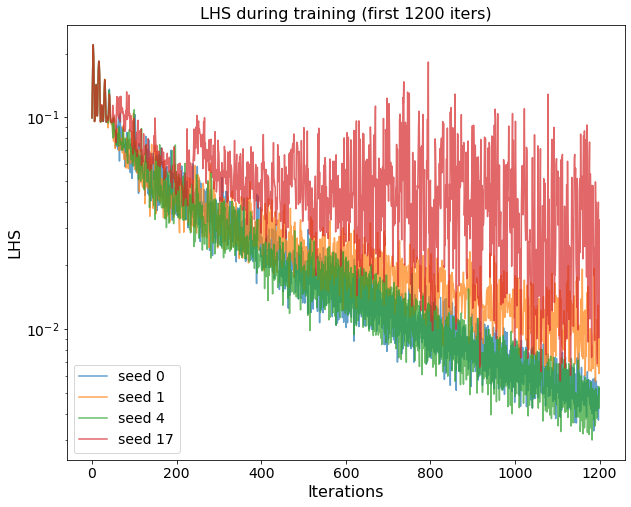

In [23]:
# Plot the LHS during training
burv_lhs = get_full_df("rand_reps_burv_lhs.npy")
get_lhs_plots(burv_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,4,17])

## 10.3 LHS+RHS Noise

In [29]:
# Get a summary of the MSE across seeds
burv_full = get_full_df("rand_reps_burv_doublenoise.npy")
burv_summary = get_summary_df(burv_full, n_reps=20)
burv_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.000005,2786,0.000005,3000
1,0.000332,680,0.000727,3000
2,0.000070,1904,0.000118,3000
3,0.000004,2390,0.000013,3000
4,0.000007,2910,0.000010,3000
5,0.000021,2862,0.000024,3000
6,0.000005,2854,0.000016,3000
7,0.000007,2645,0.000010,3000
8,0.000005,2278,0.000007,3000
9,0.000006,2947,0.000006,3000


# 11. ACA (Allen-Cahn)

## 11.1 No noise 

In [24]:
# Get a summary of the MSE across seeds
aca_full = get_full_df("rand_reps_aca.npy")
aca_summary = get_summary_df(aca_full, n_reps=20)
aca_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.235425,2012,0.387584,10000
1,0.029949,9934,0.030000,10000
2,0.218330,2237,0.260793,10000
3,0.032865,9973,0.032941,10000
4,0.310907,1852,0.360900,10000
5,0.306078,1511,0.339563,10000
6,0.029835,9903,0.029848,10000
7,0.032698,9992,0.032724,10000
8,0.118094,9766,0.118236,10000
9,0.292164,1353,0.312915,10000


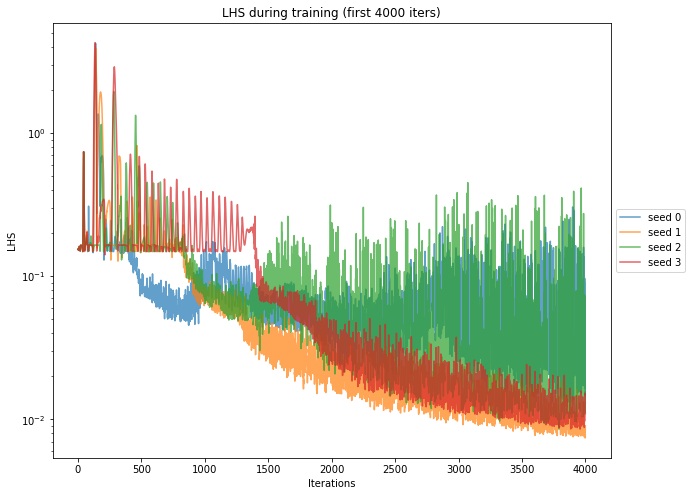

In [4]:
# Plot the LHS during training
aca_lhs = get_full_df("rand_reps_aca_lhs.npy")
get_lhs_plots(aca_lhs, n_reps=20, prop_iters=0.4, subset=[0,1,2,3])

## 11.3 LHS+RHS Noise

In [7]:
# Get a summary of the MSE across seeds
aca_full = get_full_df("aca_rand_reps_gan.npy")
aca_summary = get_summary_df(aca_full, n_reps=10)
aca_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.062877,930,0.156087,10000
1,0.025147,9989,0.025244,10000
2,0.020295,9966,0.020348,10000
3,0.007939,9990,0.007944,10000
4,0.015519,9981,0.015532,10000
5,0.005899,9994,0.005901,10000
6,0.008757,10000,0.008757,10000
7,0.019195,9990,0.019219,10000
8,0.070014,223,0.367163,10000
9,0.007380,9997,0.007383,10000


# 12. EINS

## 12.3 LHS+RHS Noise

In [5]:
# Get a summary of the MSE across seeds
eins_full = get_full_df("eins_rand_reps_gan_combined.npy")
eins_summary = get_summary_df(eins_full, n_reps=10)
eins_summary

,min_mse,min_mse_iters,final_mse,final_mse_iters
0,0.000679,34999,0.000679,35000
1,0.000495,34978,0.000495,35000
2,0.000557,35000,0.000557,35000
3,0.001273,35000,0.001273,35000
4,0.000958,34998,0.000959,35000
5,0.000403,34999,0.000403,35000
6,0.000607,35000,0.000607,35000
7,0.000911,35000,0.000911,35000
8,0.000604,35000,0.000604,35000
9,0.000782,34993,0.000783,35000
